# Recognising Handwritten Digits on MNIST DataSet using KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mnist =pd.read_csv("train.csv")

In [3]:
mnist
#(rows,cols)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
0           0  ...         0         0         0         0         0   
1           0  ...         0         0         0         0         0   
2           0  ...         0         0         0         0         0   
3           0  ...         0         0         0         0         0   
4           0  ...         0         0         0         0         0   
...       ...  ...       ...       ...       ...       ...       ...   
41995       0  ...         0         0         0         0         0   
41996       0  ...         0         0         0         0         0   
41997       0  ...         0         0         0         0         0   
41998       0  ...         0         0         0         0         0   
41999       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
0             0         0         0         0         0  
1             0         0         0         0         0  
2             0         0         0         0         0  
3             0         0         0         0         0  
4             0         0         0         0         0  
...         ...       ...       ...       ...       ...  
41995         0         0         0         0         0  
41996         0         0         0         0         0  
41997         0         0         0         0         0  
41998         0         0         0         0         0  
41999         0         0         0         0         0  

[42000 rows x 785 columns]

In [4]:
mnist.head()
#label isalways y
#and we have 784 pixels

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [5]:
X= mnist.iloc[: ,1:].values #bcz we are accessing integer val 
# accesing number instead of categorical data
y=mnist["label"].values
#here we have used .numpy to convert it into numpy array

In [6]:
X.shape

(42000, 784)

In [7]:
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#this just for splitting train and test

In [10]:

X_train.shape

(33600, 784)

In [11]:
y_train.shape

(33600,)

In [12]:
X_test.shape

(8400, 784)

In [13]:
y_test.shape

(8400,)

In [14]:
#we can apply kNN on this 

In [15]:
# def plot_image(img):
#     plt.imshow(img.reshape(28,28)) #this function gives u acolor map 
#     plt.show()

In [16]:
def plot_image(img):
    plt.imshow(img.reshape(28,28) ,cmap="gray") #this function gives u acolor map 
    #imshow just plot img and in img u will get (1,784)
    
    #so converting 784 into 28x28  
    plt.show()
    #as the img is graay scale so if we dont put cmap it 
    #automatically put so some color imshow ()
    

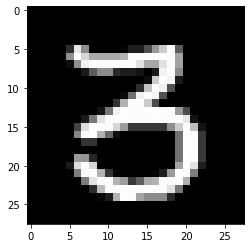

3


In [17]:
plot_image(X_train[60])
print(y_train[60])

# kNN

In [18]:
def distance(pA, pB):
    return np.sum((pB - pA)**2)**0.5

In [19]:
def kNN(X, y, x_query, k = 5):
    """
    X - > (m, 784)  np array (m is just number of eg. images)
    y - > (m,) np array
    x_query -> (1,874) np array
    k -> scaler  int
    
    do knn for classification
    """
    
    m = X.shape[0]
    distances = []
    for i in range(m):
        dis = distance(x_query, X[i])
        distances.append((dis, y[i]))
        
    distances = sorted(distances)
    distances = distances[:k]
    
    distances = np.array(distances)
    labels = distances[:, 1]
    
    
    uniq_label, counts = np.unique(labels, return_counts=True)

    pred = uniq_label[counts.argmax()]
    
    
    return int(pred)

In [20]:
# prediciting label for test
kNN(X_train , y_train, X_test[235], k=7)
#X_test if for testing

4

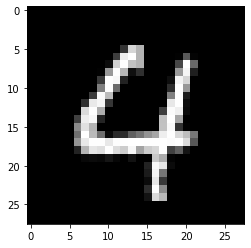

In [21]:
# displaying test image
plot_image(X_test[235])

In [22]:
# actual label
y_test[235]
#this for checking that is X_train ==y_train

4

# Prediciting 100 Images

In [23]:
predictions = []
for i in range(100):
    p = kNN(X_train , y_train, X_test[i], k=7)
    predictions.append(p)

In [24]:
predictions = np.array(predictions)
predictions.dtype

dtype('int32')

# Accuracy on 100 Images

In [25]:
p=(y_test[:100] == predictions)
type(p)

numpy.ndarray

In [26]:
(y_test[:100] == predictions).sum()/len(predictions) #or 100

0.99

# KNN From sklearn